In [26]:
# Import Essential Libraries for EDA

import pandas as pd       # Data manipulation
import numpy as np        # Numerical operations
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns    
import warnings
warnings.filterwarnings('ignore')
# Settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
%matplotlib inline

### Exploratory Data Analysis

Load the dataset 

In [27]:
df = pd.read_csv('diabetes.csv')      

View the dataset

In [28]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
# shape of dataset
df.shape

(768, 9)

In [30]:
# dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [31]:
# Satatical Summary of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [32]:
# check data type
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [33]:
df.duplicated().sum()

np.int64(0)

In [34]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 📊 Data Visualization

- **Bar Plot** – Compares values .
- **Box Plot** – Shows data distribution, median, and outliers.
- **Heatmap** – Visualizes correlations between numerical variables.


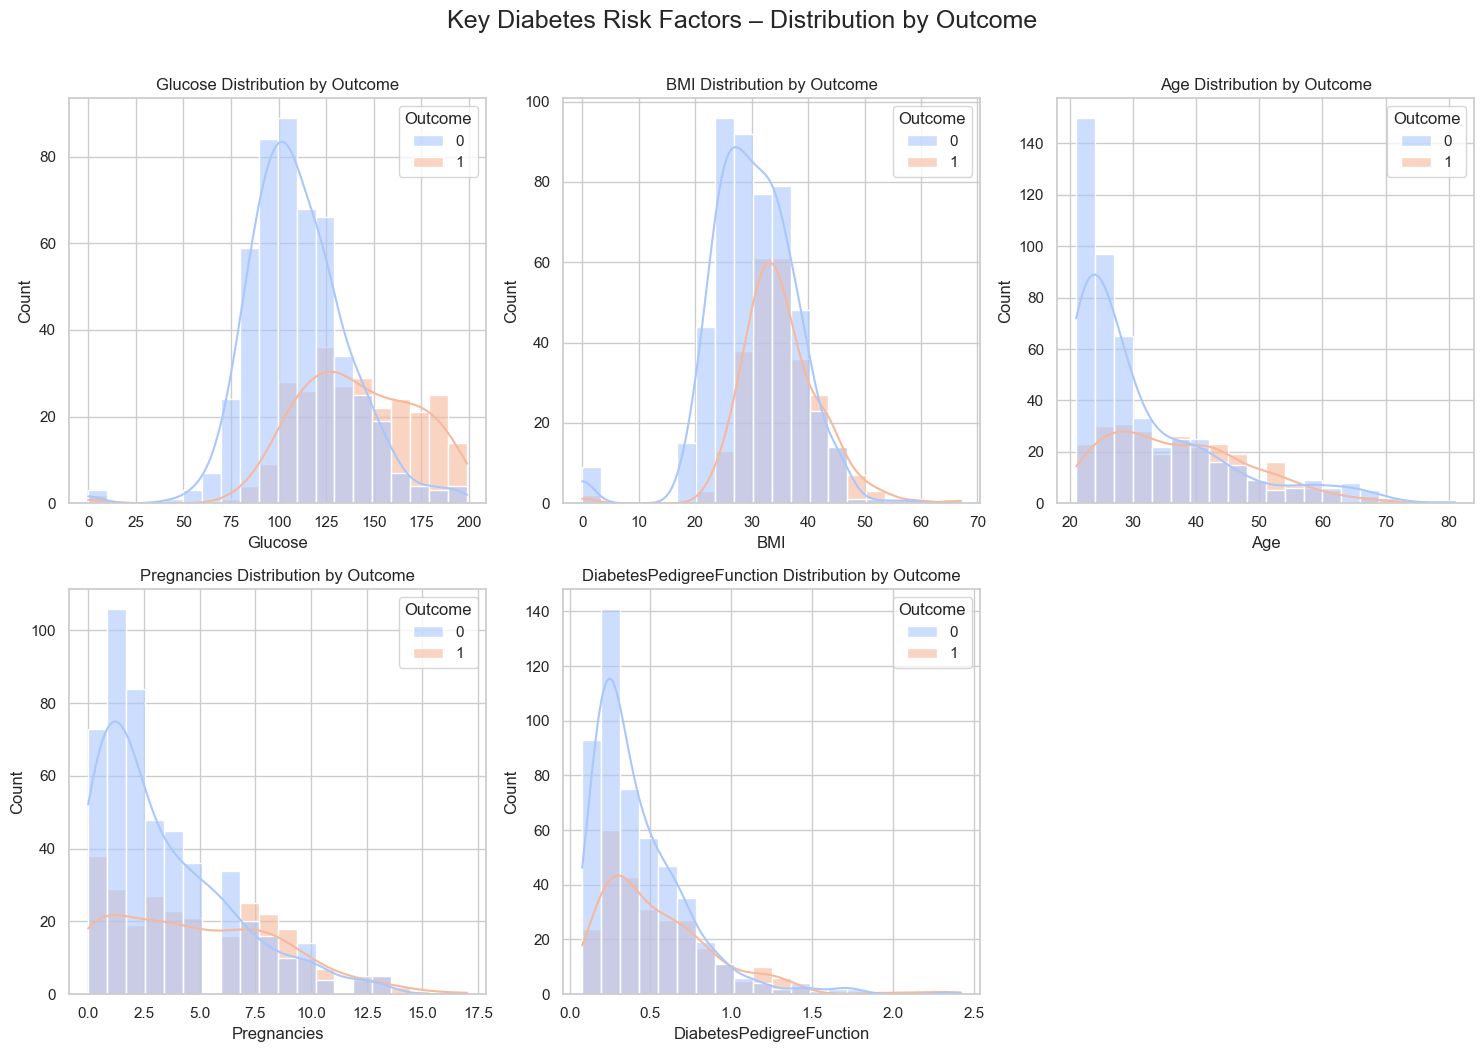

In [35]:
key_factors = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction']

plt.figure(figsize=(15, 10))
for i, col in enumerate(key_factors, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=col, hue='Outcome', bins=20, kde=True, palette='coolwarm', alpha=0.6)
    plt.title(f'{col} Distribution by Outcome')
plt.tight_layout()
plt.suptitle('Key Diabetes Risk Factors – Distribution by Outcome', fontsize=18, y=1.05);


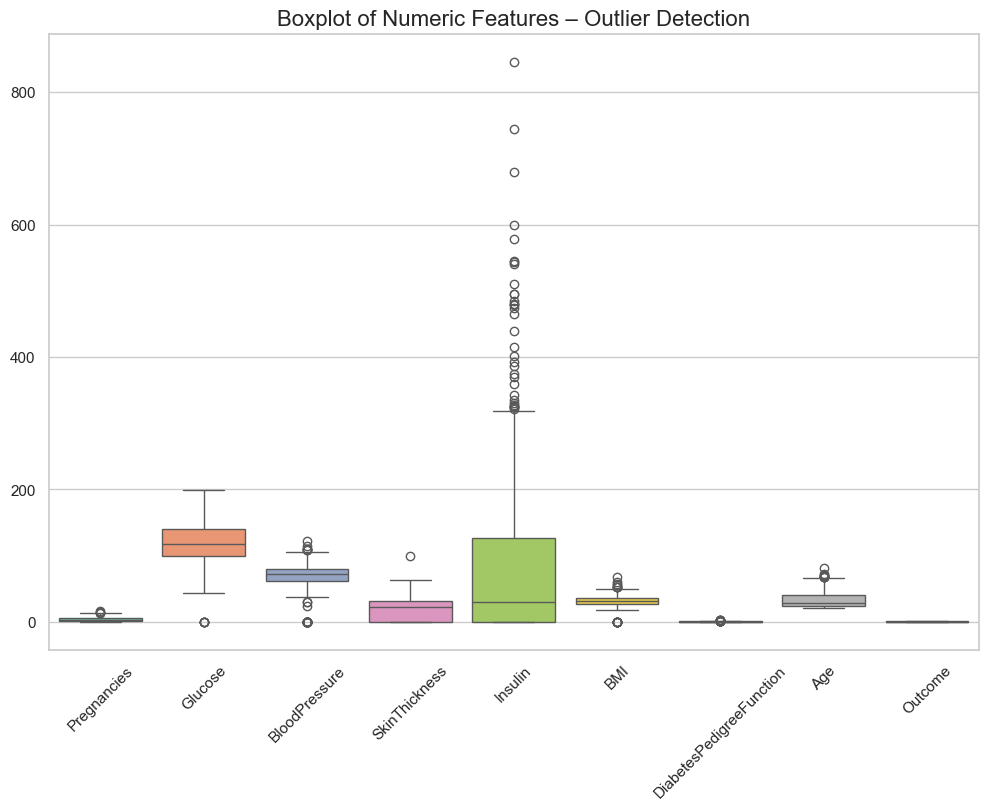

In [36]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_df, orient="v", palette="Set2")
plt.title("Boxplot of Numeric Features – Outlier Detection", fontsize=16)
plt.xticks(rotation=45)
plt.show()

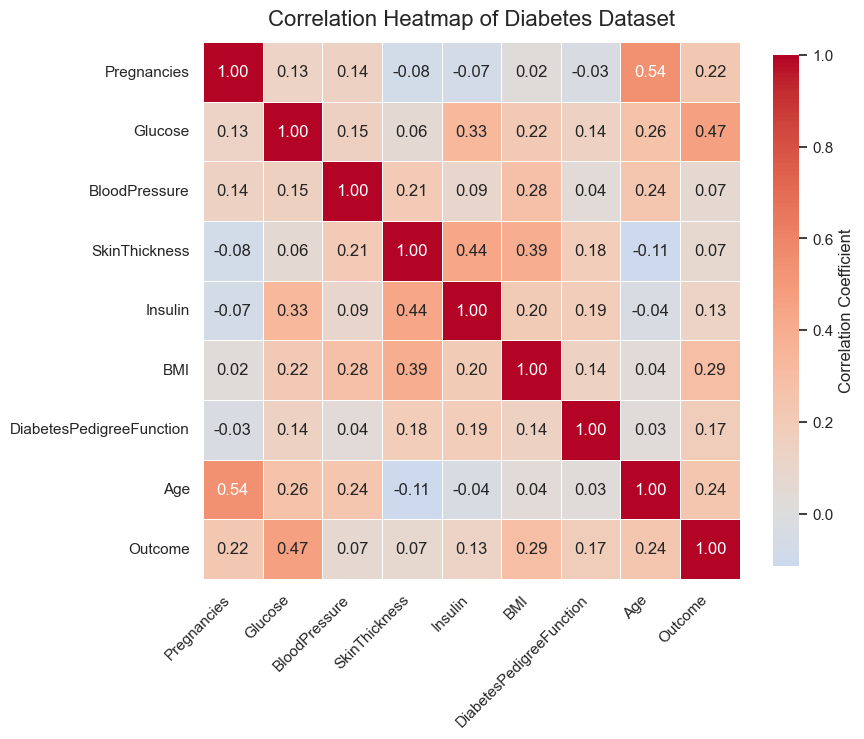

In [37]:
plt.figure(figsize=(9, 8))
corr_matrix = df.corr(numeric_only=True) 
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f",              
    cmap="coolwarm",       
    center=0,               
    square=True,           
    linewidths=0.5,        
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}  
)
plt.title("Correlation Heatmap of Diabetes Dataset", fontsize=16, pad=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show();


###  **Data Preprocessing**

### Handling Outliers with the IQR Method

In [38]:
columnss_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

for col in columnss_to_check:
    zero_count = (df[col] == 0).sum()
    print(zero_count)

5
35
227
374
11


In [39]:

columns_to_fix = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in columns_to_fix:
    median_val = df[col].median()
    df[col] = df[col].replace(0, median_val)

###  Find Best Model

In [40]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [42]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,3.782101,122.206226,72.505837,27.058366,94.131323,32.281128,0.473089,33.190661
std,3.277187,30.523252,12.092761,8.909360,106.024381,6.960701,0.341989,11.731010
min,0.000000,44.000000,24.000000,8.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,100.000000,64.000000,23.000000,30.500000,27.125000,0.244250,24.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.000000,0.383500,29.000000
75%,6.000000,140.000000,80.000000,32.000000,125.750000,36.500000,0.614500,41.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000


In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

logistic regration

In [44]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report

model_logistic = LogisticRegression()
model_logistic.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [45]:
y_pred_logisctic = model_logistic.predict(X_test)

In [46]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred_logisctic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logisctic))


print("\nClassification Report:\n", classification_report(y_test, y_pred_logisctic))

Accuracy Score:  0.7637795275590551
Confusion Matrix:
 [[141  27]
 [ 33  53]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       168
           1       0.66      0.62      0.64        86

    accuracy                           0.76       254
   macro avg       0.74      0.73      0.73       254
weighted avg       0.76      0.76      0.76       254



[1]Linear regrastion

In [47]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [48]:

y_pred_linear = linear_model.predict(X_test)

y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred_linear]

print("Accuracy Score:", accuracy_score(y_test, y_pred_binary))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))
print("Classification Report:\n", classification_report(y_test, y_pred_binary))

Accuracy Score: 0.7440944881889764
Confusion Matrix:
 [[141  27]
 [ 38  48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       168
           1       0.64      0.56      0.60        86

    accuracy                           0.74       254
   macro avg       0.71      0.70      0.70       254
weighted avg       0.74      0.74      0.74       254



[2] KNeighborsClassifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors= 5)
knn_model.fit(X_train_scaled,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [51]:
y_pred_knn = knn_model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

Accuracy Score: 0.33858267716535434
Confusion Matrix:
 [[  0 168]
 [  0  86]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       168
           1       0.34      1.00      0.51        86

    accuracy                           0.34       254
   macro avg       0.17      0.50      0.25       254
weighted avg       0.11      0.34      0.17       254



3. Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [53]:

y_pred_rf = rf_classifier.predict(X_test)

In [54]:
accuracy = accuracy_score(y_test, y_pred_rf)
classification_rep = classification_report(y_test, y_pred_rf)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_rep)

sample = X_test.iloc[0:1]
prediction = rf_classifier.predict(sample)

sample_dict = sample.iloc[0].to_dict()
print(f"\nSample Passenger: {sample_dict}")

Accuracy: 0.7637795275590551

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       168
           1       0.65      0.65      0.65        86

    accuracy                           0.76       254
   macro avg       0.74      0.74      0.74       254
weighted avg       0.76      0.76      0.76       254


Sample Passenger: {'Pregnancies': 6.0, 'Glucose': 98.0, 'BloodPressure': 58.0, 'SkinThickness': 33.0, 'Insulin': 190.0, 'BMI': 34.0, 'DiabetesPedigreeFunction': 0.43, 'Age': 43.0}


3. Gradient Boosting Models

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

SEED = 23

gbr = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=300,
    max_depth=3,       
    random_state=SEED,
    max_features=5
)

# Train model
gbr.fit(X_train, y_train)

# Predictions
gbr_pred_y = gbr.predict(X_test)
gbr_pred_prob = gbr.predict_proba(X_test)[:, 1]  # for ROC-AUC

# Metrics
accuracy = accuracy_score(y_test, gbr_pred_y)
precision = precision_score(y_test, gbr_pred_y)
recall = recall_score(y_test, gbr_pred_y)
f1 = f1_score(y_test, gbr_pred_y)
roc_auc = roc_auc_score(y_test, gbr_pred_prob)

# Print results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")


Accuracy: 0.7086614173228346
Precision: 0.57
Recall: 0.60
F1-score: 0.58
ROC-AUC: 0.77


4. Support Vector Machine (SVM)

In [56]:
from sklearn.svm import SVC
model_svm = SVC(kernel = 'linear')
model_svm.fit(X_train_scaled, y_train)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [57]:
y_pred_svc = model_svm.predict(X_test_scaled)
print(f"Accuracy:",accuracy_score(y_test,y_pred_svc))
print(f'confusion_matrix:',confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))

Accuracy: 0.7519685039370079
confusion_matrix: [[141  27]
 [ 36  50]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       168
           1       0.65      0.58      0.61        86

    accuracy                           0.75       254
   macro avg       0.72      0.71      0.72       254
weighted avg       0.75      0.75      0.75       254



| Model              | Accuracy               |
|--------------------|------------------------|
| Random Forest      | 0.7637795275590551      |
| Logistic Regression| 0.7637795275590551      |
| SVM                | 0.7519685039370079      |
| Linear Regression  | 0.7440944881889764      |
| Gradient Boosting  | 0.7086614173228346      |
| KNN                | 0.6850393700787402      |


for balanced performance and interpretability → Logistic Regression wins.

for priority is detecting positives (medical screening) and you can tolerate a slight drop in accuracy → LightGBM is better